# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [1]:
import pandas as pd

The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [178]:
imdb_df=pd.read_csv("/Users/kaushikchaturvedula/python/imdb_1000.csv")

In [179]:
imdb_df.head(5)# show first 5 rows of imdb_df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [128]:
bikes_df=pd.read_csv("/Users/kaushikchaturvedula/python/bikes.csv",sep=";",parse_dates=['Date'])# load bikes dataset as pandas dataframe

In [129]:
bikes_df.head(3)# show first 3 rows of bikes_df

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
1,2012-02-01,00:00,43,83,153,68,11.0,53,6,1,21.0
2,2012-03-01,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [130]:
imdb_df.columns# list columns of imdb_df

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [131]:
imdb_df.dtypes# what are the datatypes of values in columns

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [132]:
imdb_df['title'].head()# list first 5 movie titles

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [133]:
imdb_df[['title','genre']].head()# show only movie title and genre

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [134]:
imdb_df['duration'].dtype# show the type of duration column

dtype('int64')

In [135]:
imdb_df['duration'].values[:12]# show duration values of movies as numpy arrays

array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139, 178, 148])

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [136]:
toupper=lambda x:x.upper()
imdb_df['title'].apply(toupper).head()                               # convert all the movie titles to uppercase

0    THE SHAWSHANK REDEMPTION
1               THE GODFATHER
2      THE GODFATHER: PART II
3             THE DARK KNIGHT
4                PULP FICTION
Name: title, dtype: object

## Plotting a column

Use ``.plot()`` function!

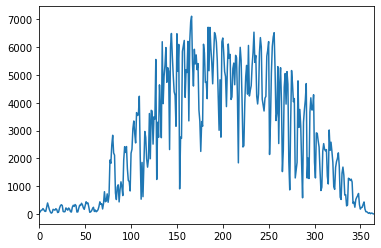

In [137]:
import matplotlib.pyplot as plt

bikes_df['Berri1'].plot()
plt.show()                # plot the bikers travelling to Berri1 over the year

In [138]:
# plot all the columns of bikes_df

## Value counts

Get count of unique values in a particular column/Series.

In [139]:
imdb_df['genre'].value_counts()# what are the unique genre in imdb_df?
print("unique genres are History and Fantasy")      #from the count table

unique genres are History and Fantasy


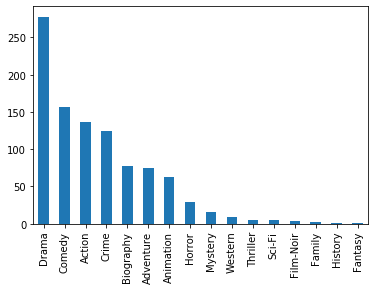

In [140]:
imdb_df['genre'].value_counts().plot.bar()# plotting value counts of unique genres as a bar chart

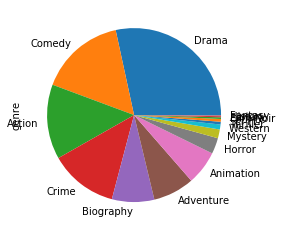

In [42]:
imdb_df['genre'].value_counts().plot.pie()# plotting value counts of unique genres as a pie chart

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [43]:
list(bikes_df.head().index.values.tolist()) # show index of bikes_df

[0, 1, 2, 3, 4]

In [56]:
bikes_df.loc[(bikes_df['Date']=='2012-01-01')]# get row for date 2012-01-01

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0


#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [57]:
imdb_df.iloc[11]# show 11th row of imdb_df using iloc

star_rating                                                     8.8
title                                                     Inception
content_rating                                                PG-13
genre                                                        Action
duration                                                        148
actors_list       [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...
Name: 11, dtype: object

## Selecting rows where column has a particular value

In [143]:
 #select only those movies where genre is adventure

imdb_df.query('genre == "adventure"',inplace=True)
imdb_df.head()

,star_rating,title,content_rating,genre,duration,actors_list


In [148]:
imdb_df.query('duration >= 130 and star_rating > 8',inplace=True)
imdb_df# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?

,star_rating,title,content_rating,genre,duration,actors_list


## Adding a new column to DataFrame

In [197]:
# add a weekday column to bikes_df
Type_new = pd.Series([])
# running a for loop and asigning some values to series 
for i in range(len(bikes_df)): 
    if bikes_df.index[i] == 0: 
        Type_new[i]="monday"
  
    elif bikes_df.index[i] == 2: 
        Type_new[i]="tuesday"
  
    elif bikes_df.index[i] == 3: 
        Type_new[i]="wednesday"
  
    else: 
        Type_new[i]= 'thursday' 
  
          
# inserting new column with values of list made above         
bikes_df.insert(2, "weekday", Type_new) 
  
# list output 
bikes_df.head() 

,Date,Rachel / Papineau,weekday,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,16,monday,35,51,38,5.0,26,10,0,27.0
2,2012-03-01,58,wednesday,135,248,104,2.0,89,3,2,15.0
3,2012-04-01,61,thursday,144,318,116,2.0,111,8,1,19.0
4,2012-05-01,95,thursday,197,330,124,6.0,97,13,2,16.0
5,2012-06-01,75,thursday,146,244,98,4.0,86,4,0,17.0


## Deleting an existing column from DataFrame

In [162]:
# remove column 'Unnamed: 1' from bikes_df
del bikes_df['Unnamed: 1']
bikes_df.head()

,Date,weekday,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,monday,16,35,51,38,5.0,26,10,0,27.0
1,2012-02-01,monday,43,83,153,68,11.0,53,6,1,21.0
2,2012-03-01,monday,58,135,248,104,2.0,89,3,2,15.0
3,2012-04-01,monday,61,144,318,116,2.0,111,8,1,19.0
4,2012-05-01,monday,95,197,330,124,6.0,97,13,2,16.0


## Deleting a row in DataFrame

In [174]:
# remove row no. 1 from bikes_df
bikes_df.drop(axis=0,index=1,inplace=True)
bikes_df.head()

,Date,weekday,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,monday,16,35,51,38,5.0,26,10,0,27.0
2,2012-03-01,monday,58,135,248,104,2.0,89,3,2,15.0
3,2012-04-01,monday,61,144,318,116,2.0,111,8,1,19.0
4,2012-05-01,monday,95,197,330,124,6.0,97,13,2,16.0
5,2012-06-01,monday,75,146,244,98,4.0,86,4,0,17.0


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [180]:
gk = imdb_df.groupby('genre')
gk.first()# group imdb_df by movie genres

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Life Is Beautiful,PG-13,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,NOT RATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


In [182]:
gk.get_group('Crime')# get crime movies group

,star_rating,title,content_rating,duration,actors_list
0,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
...,...,...,...,...,...
927,7.5,Brick,R,110,"[u'Joseph Gordon-Levitt', u'Lukas Haas', u'Emi..."
931,7.4,Mean Streets,R,112,"[u'Robert De Niro', u'Harvey Keitel', u'David ..."
950,7.4,Bound,R,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
969,7.4,Law Abiding Citizen,R,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"


In [219]:
#movie durations of groups
gk['duration'].first()

genre
Action       152
Adventure    201
Animation    125
Biography    195
Comedy       116
Crime        142
Drama         96
Family       115
Fantasy      112
Film-Noir     93
History       66
Horror       109
Mystery      112
Sci-Fi       117
Thriller     108
Western      161
Name: duration, dtype: int64

In [ ]:
# change duration of all movies in a particular genre to mean duration of the group

In [ ]:
# drop groups/genres that do not have average movie duration greater than 120.

In [200]:
df=bikes_df.groupby('weekday')# group weekday wise bikers count
df.first()

,Date,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
weekday,,,,,,,,,,
monday,2012-01-01,16,35,51,38,5.0,26,10,0,27.0
thursday,2012-04-01,61,144,318,116,2.0,111,8,1,19.0
wednesday,2012-03-01,58,135,248,104,2.0,89,3,2,15.0


In [206]:
# get weekday wise biker count
lst=df.first()
lst['Berri1']

weekday
monday        35
thursday     144
wednesday    135
Name: Berri1, dtype: int64

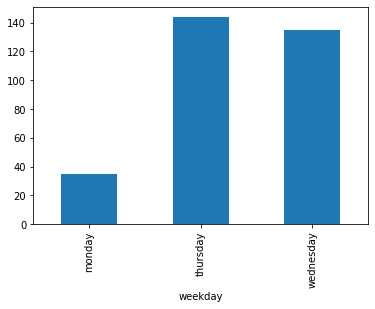

In [211]:
# plot weekday wise biker count for 'Berri1'
lst['Berri1'].plot.bar()

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)